# Crop-Land Allocation in integrated crop-livestock systems (ICLS)

### MGSC 662 - Decision Analytics taught by Prof. Javad Nasiry

##### Co-Authors : Hugo Guideau, Al Cheaito, Vasilis Christopoulos, Tirth Baldia, Rafael Chantres

### I. Introduction

Agricultural crop rotation methods have evolved significantly over time. One of the first major revolutions took place during the Middle Ages in Europe, when farmers adopted a three-year rotation system. The first year of the cycle was dedicated to summer crops, the second to winter crops, and the third to forage, allowing cattle to graze and naturally restore soil fertility.

In modern agriculture, the rise of specialized crop farms has transformed traditional rotation practices. Crop rotations now typically span three to six years, depending on the diversity of cereals and legumes grown. With advances in science, particularly in biology and chemistry, farmers have developed more sophisticated rotation strategies based on soil composition, crop requirements, and environmental conditions.

Traditionally, cattle farms adapted their practices to resemble those of specialized crop farms in order to maximize yields. They typically dedicated part of their land to pasture while using the rest to produce various crops, effectively separating cropland and livestock areas into distinct “silos.” Integrated crop–livestock systems break down these silos by reintegrating pastures into crop rotations. This approach leverages cattle manure to regenerate soil fertility, echoing the sustainable practices of earlier agricultural systems.

### II. Problem

Our global footprint is accelerating climate change, prompting the search for new initiatives to reduce carbon emissions. Integrated crop–livestock systems (ICLS) show strong potential for lowering the carbon footprint of farms. In addition, they aim to stabilize yields and improve soil quality over time by reducing soil depletion and decreasing reliance on fertilizers.

**Is integrating pasture into crop rotation the optimal solution for reducing the environmental footprint of farms?**

<p style="page-break-after:always;"></p>

### III. Modelization of the Problem

#### III.1. Scope of Study

**Geography:** The study is limited to Canada but could be applied to any scale, within Canada, or even to other countries, as soon as there is data available. The studied provinces are the following: 

|ID|Province                 |
|--|-------------------------|
| 0|Newfoundland and Labrador|
| 1|Prince Edward Island     |
| 2|Nova Scotia              |
| 3|New Brunswick            |
| 4|Quebec                   |
| 5|Ontario                  |
| 6|Manitoba                 |
| 7|Saskatchewan             |
| 8|Alberta                  |
| 9|British Columbia         |

**Crops:** The crops considered in this project are limited and focused on the most producted ones in Canada. We consider for each of the crop a constant yield fitting the table used by Steinbach, Manitoba for uptake and removal for each crop.


|ID|Crop                     |Category            |$N$ (Up)|$N$ (Re)|$P_2O_5$ (Up)|$P_2O_5$ (Re)|$K_2O$ (Up)|$K_20$ (Re)|S (Up)|S (Re)|
|--|-------------------------|--------------------|------|------|---------|---------|--------|--------|------|------|
| 0|Spring Wheat             |Cereals             |85    |60    |32       |23       |73      |18      |9     |5     |
| 1|Winter Wheat             |Cereals             |67    |52    |30       |25       |70      |17      |10    |7     |
| 2|Barley                   |Cereals             |111   |77    |45       |34       |106     |26      |13    |7     |
| 3|Oats                     |Cereals             |116   |61    |40       |25       |145     |18      |13    |5     |
| 4|Rye                      |Cereals             |92    |58    |45       |24       |130     |20      |15    |5     |
| 5|Corn                     |Cereals             |153   |97    |63       |44       |128     |27      |15    |6     |
| 6|Canola                   |Oilseeds            |112   |68    |52       |37       |81      |18      |19    |11    |
| 7|Soybeans                 |Oilseeds            |180   |135   |31       |29       |129     |49      |12    |4     |
| 8|Peas                     |Oilseeds Pulse Crops|153   |117   |43       |35       |136     |35      |12    |6     |
| 9|Lentils                  |Oilseeds Pulse Crops|92    |62    |25       |18       |76      |33      |9     |5     |
|10|Grass                    |Forages             |102   |102   |30       |30       |130     |130     |13    |13    |
|11|Corn Silage              |Forages             |156   |156   |63       |63       |201     |201     |13    |13    |    

**Years in the rotation:** We are considering 6 years in the rotation.

**Crop demand:** We use the Table 32-10-0359-01 from Statistic Canada to extract the surface dedicated to each crop per year.

#### III.2. Variables and Notations

Let $I = \{0, ..., 9\}$ the Canada provinces, $J = \{0, ..., 11\}$ the studied crops, $K = \{0, ..., 5\}$ the rotation's years and $K' = K \backslash \{5\}$. Let $V = I \times J \times K$

##### a. Surface allocated per crop

Let's define the surface allocated for crop $j \in J$, in year $k \in K$, in province $i \in I$ with $a_{i,j,k}$. On the same fashion, we can note the actual surface allocated on average to each crop as per the 32-10-0359-01 from Statistic Canada:
$$\forall (i,j) \in I \times J, A_{i,j}$$

We want to use this as the demand but yet, let's be flexible and ask for each crop to have only 80% of the demand, hence the following constraint:

$$\forall (i,j,k) \in V, a_{i,j,k} \ge 0.8A_{i,j}$$

##### b. Crop on crop allocation

To modelize the succession of choice of crop between years, we introduce the following graph:

$$ G = (X, V)$$

To simplify the notation, we will note each vertex of this graph: $\forall (i, j, k) \in V, j_k^i = (i, j, k)$

The edges are defined by $x_{j_k^i, l_m^i}$ as the portion of harvested surface of crop j in year k used the next year m for crop l, all in the province i.

We consider that each province is independent, and that the edges are only defined year on year (we respect the chronological order), which leads to the following constraints:

$$ \forall j_k^i, l_m^h \in V^2, x_{j_k^i, l_m^h} = 0 \text{ if } h \neq i$$

$$ \forall j_k^i, l_m^i \in V^2, x_{j_k^i, l_m^i} = 0 \text{ if } m \neq k+1 \text{ or } (k,m) \neq (5,0)$$

For the rest of the study, we will simplify the size of X to the following: $X \in I \times J^2 \times K$ as for each province i and each year k, we need to assess the portion between each couple $(j,l) \in J^2$. Considering that all edges from k to k + 1 can be assigned to year k, we can write in a simple form: 

$$ \forall i, j, l, k \in I \times J^2 \times K', x_{j_k^i, l_{k+1}^i} = x_{j,l}^{i,k}$$

$$ \forall i, j, l \in I \times J^2, x_{j_5^i, l_0^i} = x_{j,l}^{i,5}$$

Thus, we have now:

$$ X = (x_{j,l}^{i,k})$$

We have to ensure that the chosen portions are consistent with the surface allocated per crops. This leads to the following constraints:

$$ \forall i, j, k \in I \times J \times K, a_{i, j, k} = \sum_{l \in J} x_{j,l}^{i,k}$$

$$ \forall i, l, k \in I \times J \times K', a_{i, l, k+1} = \sum_{j \in J} x_{j,l}^{i,k}$$

$$ \forall i, l \in I \times J, a_{i, l, 0} = \sum_{j \in J} x_{j,l}^{i,5}$$

##### c. Nutrients needs

Now that we have the portion of each crop surface dedicated to the next crop, we are able to compute what are the amounts of nutrients to bring for each new surface.

Let's start with an example. We set ourselves in province 0, and we look at the quantity of nitrogen to bring to crop 0 in year 1, knowing the portion of previous crop surfaces used from year 0. Then, the amount follows the formula:

$$ Q_{N, 0_1^0} = a_{0,0,1} \times N(Up)_0 - \sum_{j \in J} x_{j,0}^{0,0} \times (N(Up)_j - N(Re)_j)$$

We can extend this formula to all vertices of our graph and to all nutrients $N = \{N, P_2O_5, K_2O, S\}$, having the formula:

$$ \forall (n,i,l,k) \in (N \times I \times J \times K'), Q_{n, l_{k+1}^i} = a_{i,l,k+1} \times n(Up)_l - \sum_{j \in J} x_{j,l}^{i,k} \times (n(Up)_j - n(Re)_j) $$

$$ \forall (n,i,l) \in (N \times I \times J), Q_{n, l_{0}^i} = a_{i,l,0} \times n(Up)_l - \sum_{j \in J} x_{j,l}^{i,5} \times (n(Up)_j - n(Re)_j) $$

##### d. Decision variables

Let's resume the decision variables:

|Variables          |Description                                                                |Number                 |
|-------------------|---------------------------------------------------------------------------|-----------------------|
|$$(a_{i,j,k})$$    |Overall allocation of surface per crop each year per province              |$$Card(V)$$            |
|$$(x_{j,l}^{i,k})$$|Set of portions of land allocated from crop to crop, YoY, per province     |$$Card(V \times J)$$   |


##### e. Objective function

Our objective is to limit the need to bring additional nutrients to the field. Thus, our first objective function would be:

$$ \min \sum_{n,i,j,k} Q_{n, j_k^i} $$

##### f. Constraints

|Description                                                                   |Formula                                                        |
|------------------------------------------------------------------------------|---------------------------------------------------------------|
|Yearly allocation of crops has to reach 80% of the actual surface seeded      |$$\forall (i,j,k) \in V, a_{i,j,k} \ge 0.8A_{i,j}$$              |
|Fields degree constraints - every field must be reused                        |$$ \forall i, j, k \in I \times J \times K, a_{i, j, k} = \sum_{l \in J} x_{j,l}^{i,k}$$|
|Fields degree constraints - every field should receive their exact allocation |$$ \forall i, l, k \in I \times J \times K', a_{i, l, k+1} = \sum_{j \in J} x_{j,l}^{i,k}$$ <br> $$ \forall i, l \in I \times J, a_{i, l, 0} = \sum_{j \in J} x_{j,l}^{i,5}$$|

Let's code and see what are the results!



In [1]:
import gurobipy as gb
from gurobipy import *
import numpy as np
import pandas as pd
from random import random

In [6]:
# Define the data

I = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Provinces = [
    "Newfoundland and Labrador",
    "Prince Edward Island",
    "Nova Scotia",
    "New Brunswick",
    "Quebec",
    "Ontario",
    "Manitoba",
    "Saskatchewan",
    "Alberta",
    "British Columbia",
]
J = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Crops = [
    "Spring Wheat",
    "Winter Wheat",
    "Barley",
    "Oats",
    "Rye",
    "Corn",
    "Canola",
    "Soybeans",
    "Peas",
    "Lentils",
    "Grass",
    "Corn Silage",
]
K = [0, 1, 2, 3, 4, 5]

# Crop needs

uptake = [
    [85, 32, 73, 9],     # Spring Wheat
    [67, 30, 70, 10],    # Winter Wheat
    [111, 45, 106, 13],  # Barley
    [116, 40, 145, 13],  # Oats
    [92, 45, 130, 15],   # Rye
    [153, 63, 128, 15],  # Corn
    [112, 52, 81, 19],   # Canola
    [180, 31, 129, 12],  # Soybeans
    [153, 43, 136, 12],  # Peas
    [92, 25, 76, 9],     # Lentils
    [102, 30, 130, 13],  # Grass
    [156, 63, 201, 13],  # Corn Silage
]

removal = [
    [60, 23, 18, 5],     # Spring Wheat
    [52, 25, 17, 7],     # Winter Wheat
    [77, 34, 26, 7],     # Barley
    [61, 25, 18, 5],     # Oats
    [58, 24, 20, 5],     # Rye
    [97, 44, 27, 6],     # Corn
    [68, 37, 18, 11],    # Canola
    [135, 29, 49, 4],    # Soybeans
    [117, 35, 35, 6],    # Peas
    [62, 18, 33, 5],     # Lentils
    [102, 30, 130, 13],  # Grass
    [156, 63, 201, 13],  # Corn Silage
]

# Translate lb/acre to kg/ha

uptake = np.array(uptake) * 1.12085
removal = np.array(removal) * 1.12085

# Actual seeded areas (in ha)

A = [
    [0, 6600, 1200, 2900, 55000, 25500, 1299200, 3550600, 2640300, 30600],         # Wheat, spring
    [0, 7800, 2500, 1300, 32400, 453600, 14100, 51100, 74000, 4500],               # Wheat, winter
    [0, 21100, 1500, 8100, 32800, 22900, 125200, 912100, 1337500, 21900],          # Barley
    [100, 3400, 1100, 8000, 52500, 25500, 225000, 520200, 339900, 36800],          # Oats
    [100, 1400, 500, 0, 30200, 56100, 71700, 57800, 61300, 5900],                  # Rye, all
    [0, 5700, 6200, 3900, 345800, 900000, 250700, 13800, 14300, 1000],             # Corn for grain
    [0, 0, 0, 500, 8900, 22900, 1225500, 4932100, 2512400, 45200],                 # Canola (rapeseed)
    [0, 15300, 4600, 3400, 437700, 1168800, 670200, 38600, 0, 0],                  # Soybeans
    [0, 0, 0, 0, 0, 3900, 79200, 717500, 606500, 11300],                           # Peas, dry
    [0, 0, 0, 0, 0, 0, 0, 1541300, 228800, 0],                                     # Lentils
    [5500, 41500, 47600, 55600, 652600, 622900, 520800, 1232600, 1561500, 318900], # Tame hay
    [200, 3800, 6100, 4400, 74900, 112900, 55900, 31900, 121500, 10800]            # Corn for silage
]


In [7]:
for j in J:
    total_area = sum(A[j][i] for i in I)
    print(f"Total area for crop {Crops[j]}: {total_area}")

Total area for crop Spring Wheat: 7611900
Total area for crop Winter Wheat: 641300
Total area for crop Barley: 2483100
Total area for crop Oats: 1212500
Total area for crop Rye: 285000
Total area for crop Corn: 1541400
Total area for crop Canola: 8747500
Total area for crop Soybeans: 2338600
Total area for crop Peas: 1418400
Total area for crop Lentils: 1770100
Total area for crop Grass: 5059500
Total area for crop Corn Silage: 422400


In [8]:
# Implementation of the model

m = gb.Model("Crop-rotation Optimization")

Set parameter Username
Set parameter LicenseID to value 2704311
Academic license - for non-commercial use only - expires 2026-09-07


In [9]:
# Decision variables

a = m.addVars(len(I), len(J), len(K), vtype=GRB.CONTINUOUS, name=[f"Allocation of crop {Crops[j]} in province {Provinces[i]} in year {k} (in ha)" for i in I for j in J for k in K])
x = m.addVars(len(I), len(J), len(J), len(K), vtype=GRB.CONTINUOUS, name=[f"Portion of land allocated from crop {Crops[j]} to crop {Crops[l]} in year {k} in province {Provinces[i]} (in ha)" for i in I for j in J for l in J for k in K])

In [10]:
# Computation of the quantities of nutrients to bring

Q = {}
for n in range(len(uptake[0])):
    for i in I:
        for l in J:
            for k in K:
                if k < len(K) - 1:
                    Q[n, i, l, k+1] = a[i, l, k+1] * uptake[l][n] - sum(x[i, j, l, k] * (uptake[j][n] - removal[j][n]) for j in J)
                else:
                    Q[n, i, l, 0] = a[i, l, 0] * uptake[l][n] - sum(x[i, j, l, 5] * (uptake[j][n] - removal[j][n]) for j in J)


In [11]:
# Objective function

m.setObjective(sum(Q[n, i, l, k] for n in range(len(uptake[0])) for i in I for l in J for k in K), GRB.MINIMIZE)

In [12]:
# Add Constraints

m.addConstrs((a[i, j, k] >= 0.8 * A[j][i] for i in I for j in J for k in K), name="Allocation of crops")
m.addConstrs((a[i, j, k] == sum(x[i, j, l, k] for l in J) for i in I for j in J for k in K), name="Fields degree constraints - every field must be reused")
m.addConstrs((a[i, l, k+1] == sum(x[i, j, l, k] for j in J) for i in I for l in J for k in K if k < len(K) - 1), name="Fields degree constraints - every field should receive their exact allocation")
m.addConstrs((a[i, l, 0] == sum(x[i, j, l, 5] for j in J) for i in I for l in J), name="Fields degree constraints - every field should receive their exact allocation")

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (0, 11): <gurobi.Constr *Awaiting Model Update*>,
 (1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7): <gurobi.Constr *Awaiting Model Update*>

In [13]:
# Solve the model

m.optimize()

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[arm] - Darwin 25.0.0 25A362)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2160 rows, 9360 columns and 19440 nonzeros
Model fingerprint: 0xe2993f3b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e+01, 5e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+01, 4e+06]
Presolve removed 864 rows and 144 columns
Presolve time: 0.01s
Presolved: 1296 rows, 9216 columns, 18432 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.9986883e+36   2.418500e+33   5.998688e+06      0s
     304    2.9034065e+10   0.000000e+00   0.000000e+00      0s

Use crossover to convert LP symmetric solution to basic solution...
Crossover log...

       0 DPushes remaining with DInf 0.0000000e+00                 0s

      71 PPushes remaining with PInf 0.0000000e+00                 0s
       0 PPushes remaining 

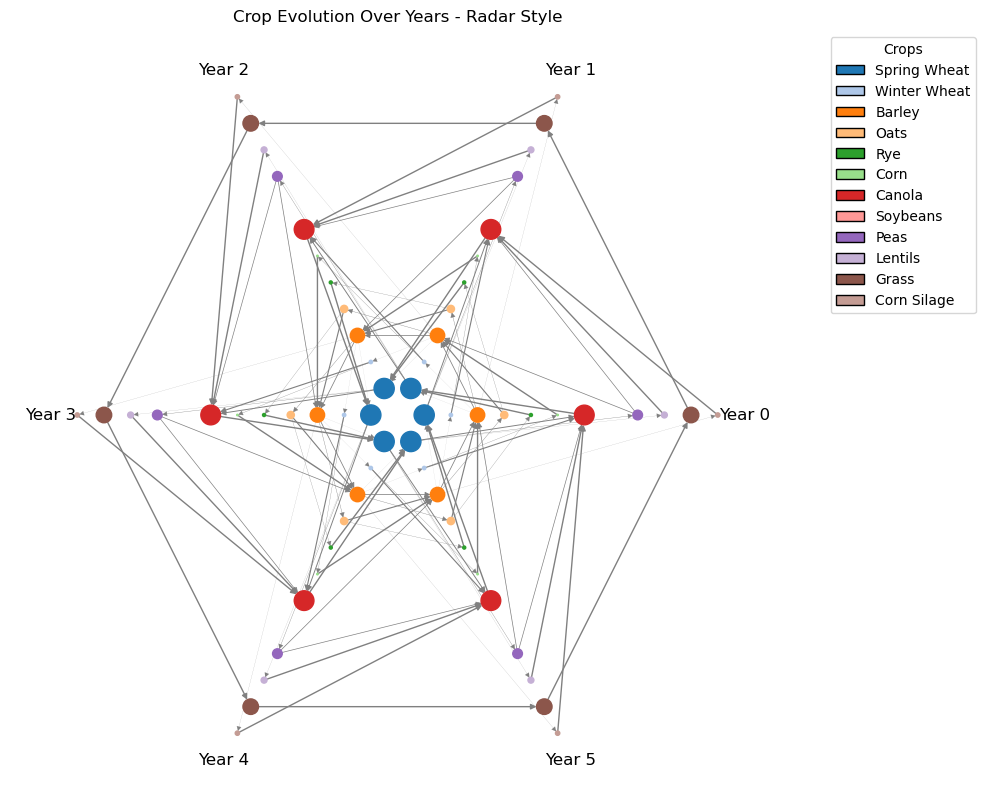

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

province = 8
num_crops = len(Crops)
num_years = len(K)
radius_step = 1  # distance between crops along each year spoke

G = nx.DiGraph()
pos = {}

# Generate a distinct color for each crop
cmap = plt.get_cmap("tab20")  # up to 10 distinct colors
crop_colors = {crop: cmap(i % 12) for i, crop in enumerate(Crops)}

# -----------------------------
# Create positions: radial layout
# Years = circle vertices
# Crops = along spokes
# -----------------------------
for k, year in enumerate(K):
    angle = 2 * np.pi * k / num_years  # angle for this year
    for j, crop in enumerate(Crops):
        r = (j+1) * radius_step  # distance from center along the spoke
        x_0 = r * np.cos(angle)
        y_0 = r * np.sin(angle)
        node_id = crop + f" (Year {year})"
        pos[node_id] = (x_0, y_0)

        # Add node if value > 0
        if a[province, j, k].X > 0:
            G.add_node(node_id, value=a[province, j, k].X, crop=crop)

# -----------------------------
# Add edges between consecutive years for each crop
# -----------------------------
for j, crop_j in enumerate(Crops):
    for k, year in enumerate(K):
            for l, crop_l in enumerate(Crops):
                if x[province, j, l, k].X > 0:
                    src = crop_j + f" (Year {year})"
                    dst = crop_l + f" (Year {k+1})" if k < len(K) - 1 else crop_l + " (Year 0)"
                    G.add_edge(src, dst, weight=x[province, j, l, k].X)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10, 10))
plt.axis("off")

# Node sizes scaled by value
node_sizes = [G.nodes[n]["value"] / 10000 for n in G.nodes()]

# Node colors based on crop
node_colors = [crop_colors[G.nodes[n]["crop"]] for n in G.nodes()]

# Edge widths scaled
edge_widths = [G[u][v]["weight"] / max(1, G.nodes[u]["value"]) for u, v in G.edges()]

nx.draw(
    G,
    pos,
    with_labels=False,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color="gray",
    width=edge_widths,
    arrows=True,
    arrowsize=8
)

# -----------------------------
# Year labels around circle
# -----------------------------
for k, year in enumerate(K):
    angle = 2 * np.pi * k / num_years
    x_text = (num_crops + 1) * radius_step * np.cos(angle)
    y_text = (num_crops + 1) * radius_step * np.sin(angle)
    plt.text(x_text, y_text, f"Year {year}", ha="center", va="center", fontsize=12)

# -----------------------------
# Legend for crop colors
# -----------------------------
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, edgecolor='k', label=crop) for crop, color in crop_colors.items()]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', title="Crops")

plt.title("Crop Evolution Over Years - Radar Style")
plt.show()